In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

# Load dataset
df = pd.read_csv("../data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
#step 3- check for missing valuues or duplicate
print("Missing values:\n", df.isna().sum())
print("\nDuplicate rows:", df.duplicated().sum())

Missing values:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Duplicate rows: 0


In [15]:
print(df.columns.tolist())

#Convert to datetime (if not already)
df["date"] = pd.to_datetime(df["date"])

#Extract useful parts
df["sale_year"] = df["date"].dt.year
df["sale_month"] = df["date"].dt.month

#Verify the new columns
df[["date", "sale_year", "sale_month"]].head()


['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


,date,sale_year,sale_month
0,2014-10-13,2014,10
1,2014-12-09,2014,12
2,2015-02-25,2015,2
3,2014-12-09,2014,12
4,2015-02-18,2015,2


In [17]:
df.info()
df.head()
print(df.columns.tolist())

df.drop(columns=["id", "date"], inplace=True)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

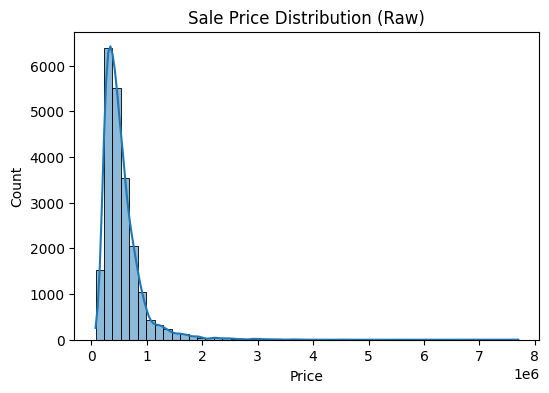

In [20]:
plt.figure(figsize=(6,4))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Sale Price Distribution (Raw)")
plt.xlabel("Price")
plt.show()


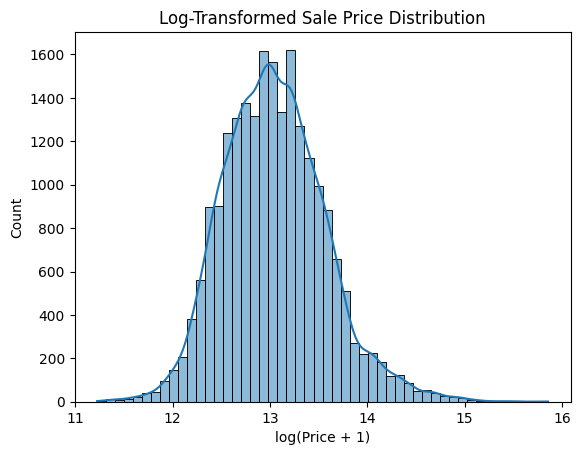

In [21]:
df["log_price"] = np.log1p(df["price"])

sns.histplot(df["log_price"], bins=50, kde=True)
plt.title("Log-Transformed Sale Price Distribution")
plt.xlabel("log(Price + 1)")
plt.show()

In [19]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [22]:
corr = df.corr(numeric_only=True)["price"].sort_values(ascending=False)
corr

price            1.000000
log_price        0.891654
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
sale_year        0.003576
sale_month      -0.010081
zipcode         -0.053203
Name: price, dtype: float64

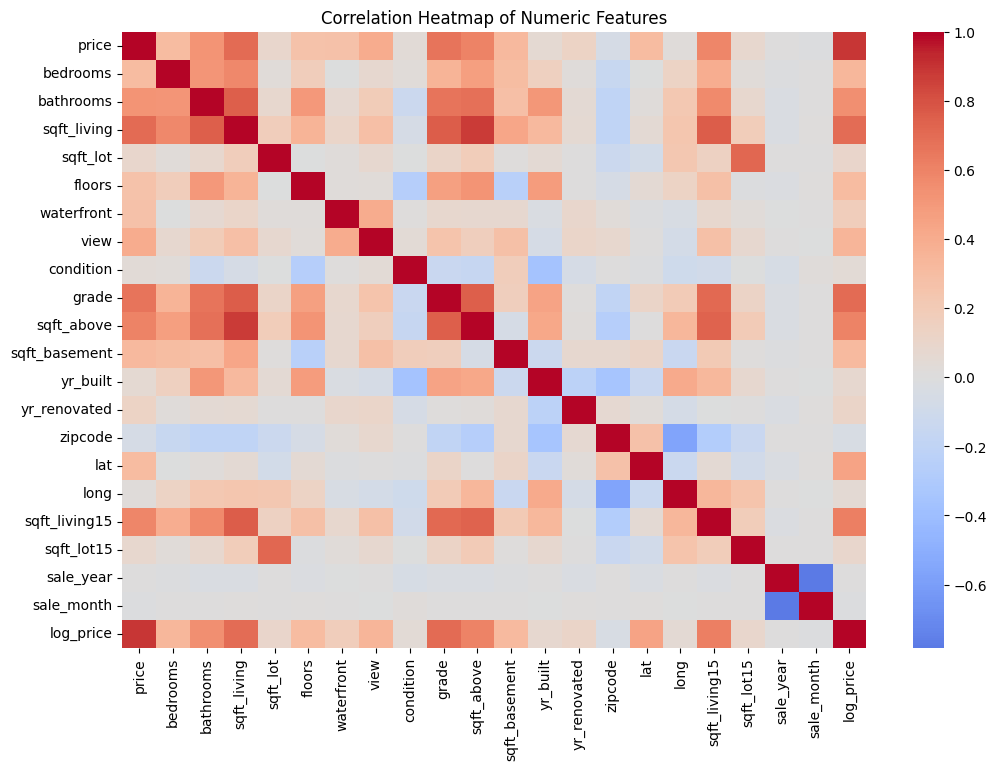

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [24]:
df.corr(numeric_only=True)["price"].sort_values(ascending=True)

zipcode         -0.053203
sale_month      -0.010081
sale_year        0.003576
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
log_price        0.891654
price            1.000000
Name: price, dtype: float64

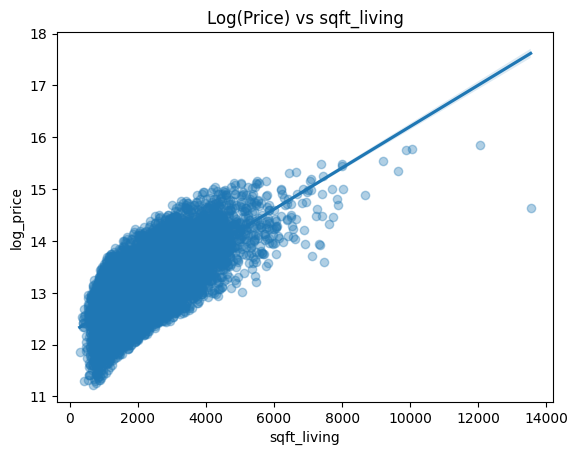

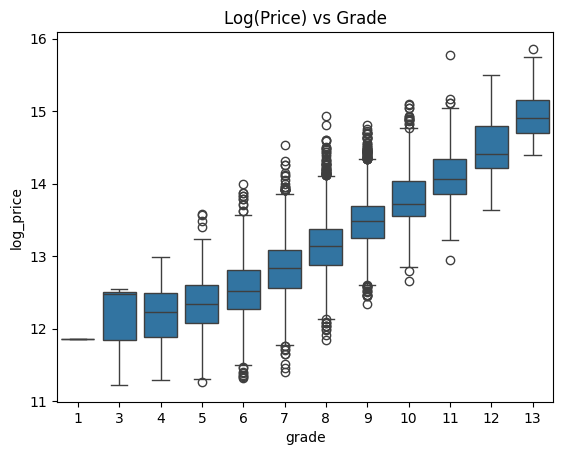

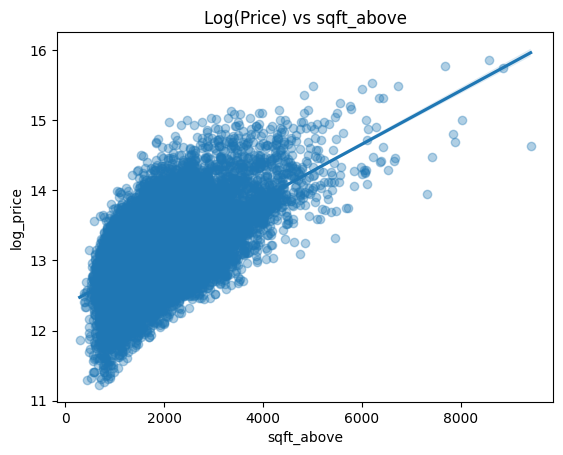

In [25]:
#pairwise relationships starting with most impactful features
#tier A(most imapactful) - sqftliving, grade and sqft above
# 1) sqft_living vs log_price
sns.regplot(x=df["sqft_living"], y=df["log_price"], scatter_kws={"alpha":0.35})
plt.title("Log(Price) vs sqft_living"); plt.show()

# 2) grade (ordinal) vs log_price
sns.boxplot(x=df["grade"], y=df["log_price"])
plt.title("Log(Price) vs Grade"); plt.show()

# 3) sqft_above vs log_price
sns.regplot(x=df["sqft_above"], y=df["log_price"], scatter_kws={"alpha":0.35})
plt.title("Log(Price) vs sqft_above"); plt.show()


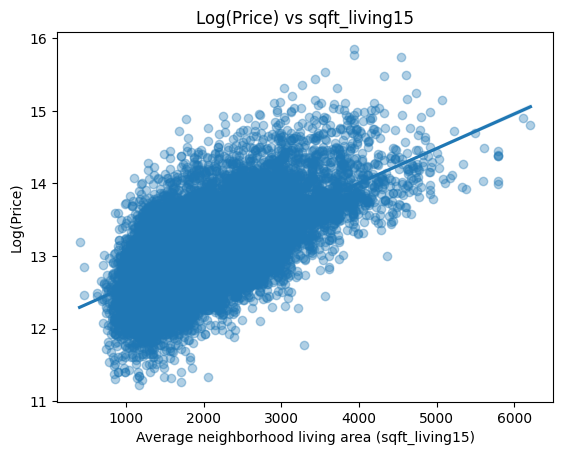

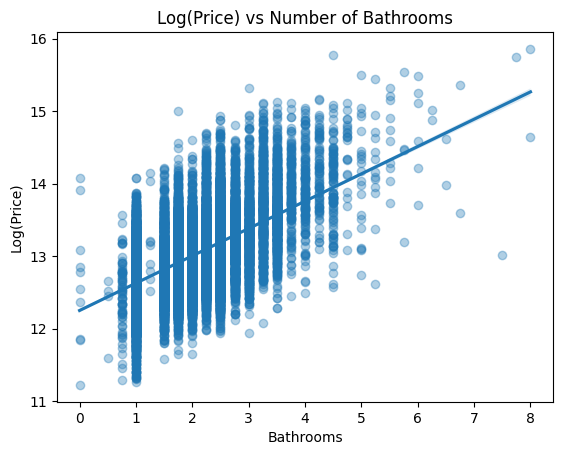

In [27]:
# analysing features for tier 2 
sns.regplot(x=df["sqft_living15"], y=df["log_price"], scatter_kws={"alpha":0.35})
plt.title("Log(Price) vs sqft_living15")
plt.xlabel("Average neighborhood living area (sqft_living15)")
plt.ylabel("Log(Price)")
plt.show()

sns.regplot(x=df["bathrooms"], y=df["log_price"], scatter_kws={"alpha":0.35})
plt.title("Log(Price) vs Number of Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Log(Price)")
plt.show()



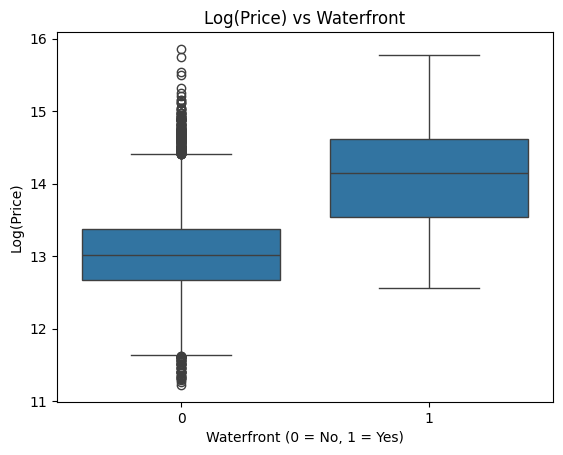

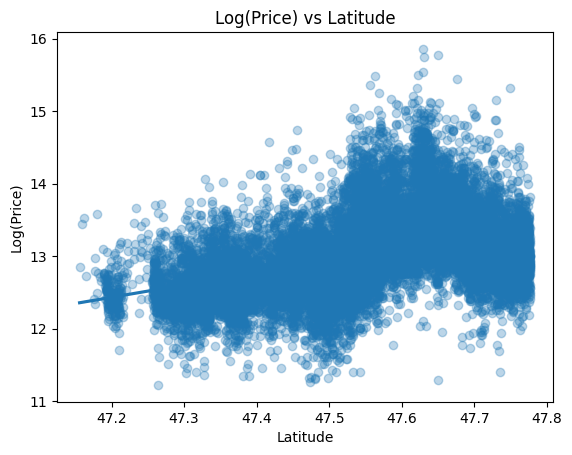

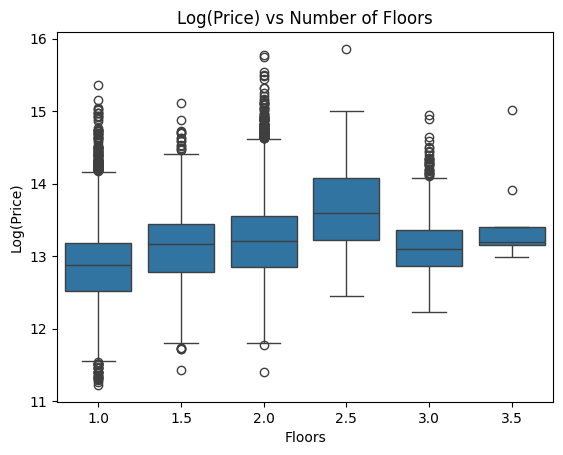

In [ ]:
#tier 2
# sns.boxplot(x=df["waterfront"], y=df["log_price"])
plt.title("Log(Price) vs Waterfront")
plt.xlabel("Waterfront (0 = No, 1 = Yes)")
plt.ylabel("Log(Price)")
plt.show()

sns.regplot(x=df["lat"], y=df["log_price"], scatter_kws={"alpha":0.3})
plt.title("Log(Price) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Log(Price)")
plt.show()

sns.boxplot(x=df["floors"], y=df["log_price"])
plt.title("Log(Price) vs Number of Floors")
plt.xlabel("Floors")
plt.ylabel("Log(Price)")
plt.show()


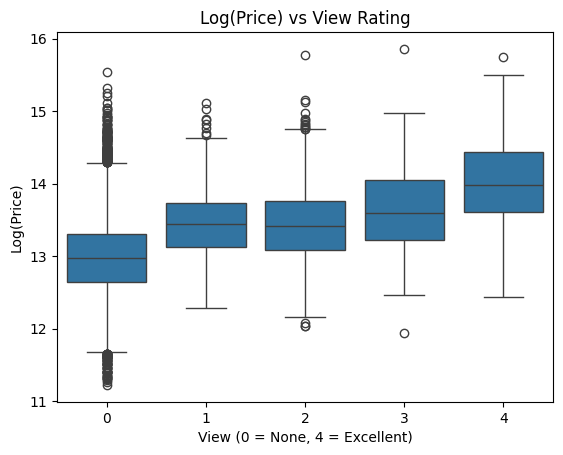

In [31]:
#tier 3
sns.boxplot(x=df["view"], y=df["log_price"])
plt.title("Log(Price) vs View Rating")
plt.xlabel("View (0 = None, 4 = Excellent)")
plt.ylabel("Log(Price)")
plt.show()

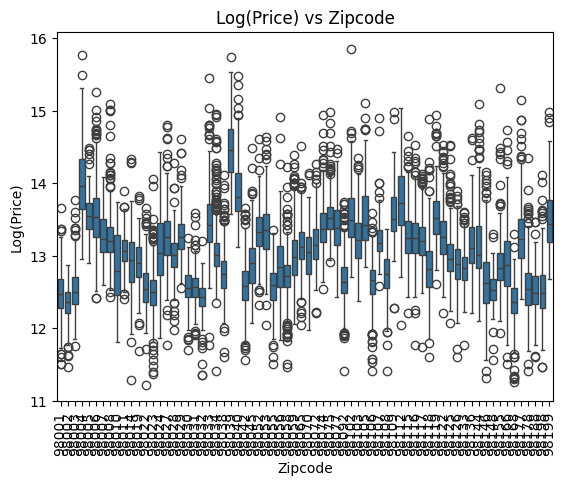

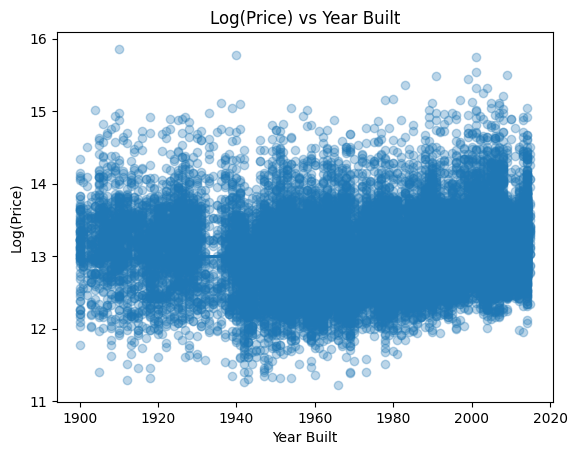

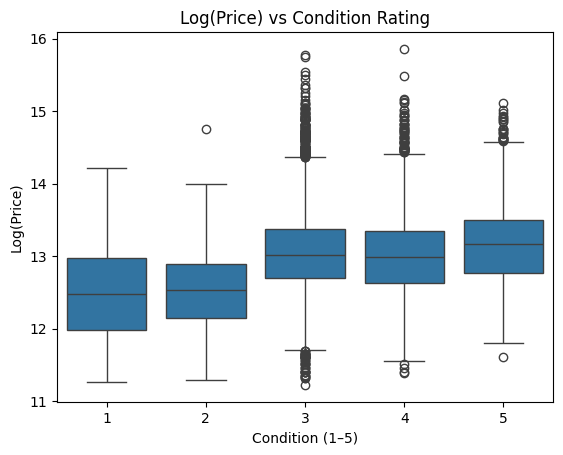

In [33]:
#last tier - weak and negative correlation features
sns.boxplot(x=df["zipcode"], y=df["log_price"])
plt.title("Log(Price) vs Zipcode")
plt.xlabel("Zipcode")
plt.ylabel("Log(Price)")
plt.xticks(rotation=90)
plt.show()

sns.regplot(x=df["yr_built"], y=df["log_price"], scatter_kws={"alpha":0.3})
plt.title("Log(Price) vs Year Built")
plt.xlabel("Year Built")
plt.ylabel("Log(Price)")
plt.show()

sns.boxplot(x=df["condition"], y=df["log_price"])
plt.title("Log(Price) vs Condition Rating")
plt.xlabel("Condition (1–5)")
plt.ylabel("Log(Price)")
plt.show()



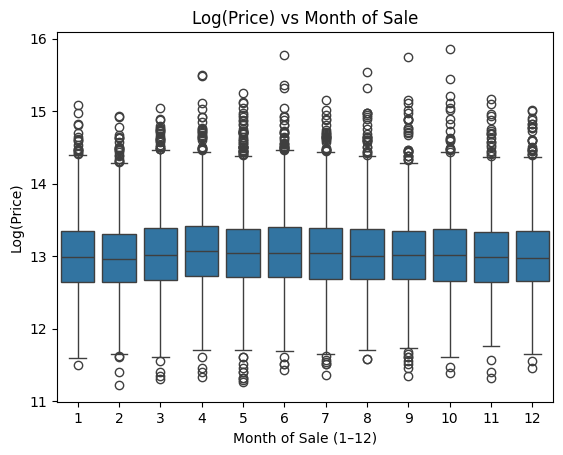

In [34]:
sns.boxplot(x=df["sale_month"], y=df["log_price"])
plt.title("Log(Price) vs Month of Sale")
plt.xlabel("Month of Sale (1–12)")
plt.ylabel("Log(Price)")
plt.show()

In [ ]:
# -----------------------------------------------
# 🧩 FEATURE ENGINEERING STEP 1
# Create derived variables + rename columns
# -----------------------------------------------

import pandas as pd

# Assuming df is your cleaned dataset after EDA
# Example: df = pd.read_csv("../data/kc_house_data_clean.csv")

# 1️ Create binary flag: was the house ever renovated?
df["is_renovated"] = (df["yr_renovated"] > 0).astype(int)

# 2️ Create house age at the time of sale
df["house_age"] = df["sale_year"] - df["yr_built"]
df.loc[df["house_age"] < 0, "house_age"] = 0   # Handle any invalid negative ages

# 3️ Optional: Create binned house age groups (for trees or visualization)
df["house_age_bin"] = pd.cut(
    df["house_age"],
    bins=[0, 20, 50, 100, df["house_age"].max()],
    labels=["<20 yrs", "20–50 yrs", "50–100 yrs", ">100 yrs"]
)

# 4️ Optional: Create price per square foot (useful for analysis / outlier detection)
df["price_per_sqft"] = df["price"] / df["sqft_living"]

# 5️ Rename confusing feature names for better interpretability
df.rename(columns={
    "sqft_living15": "neighborhood_avg_sqft"
}, inplace=True)

# 6️ (Optional) Drop redundant original columns if desired
df.drop(columns=["yr_renovated"], inplace=True)

# -----------------------------------------------
# Verify the new columns
# -----------------------------------------------
print(df[[
    "yr_built", "sale_year",
    "house_age", "house_age_bin", "is_renovated",
    "price_per_sqft", "neighborhood_avg_sqft"
]].head())

# Optional: Save intermediate engineered dataset
# df.to_csv("../data/kc_house_data_engineered_step1.csv", index=False)

KeyError: "['yr_renovated'] not in index"